<a href="https://colab.research.google.com/github/Saputoa21/ADS_2024_Saputoa/blob/master/03_Probabelistic_Modeling_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabelistic Modeling

Probability calculation is a fundamental tool for statistical inference. However, to calculate a probability, we must know in advance the [probability  distribution function and its parameters](https://statlect.com/glossary/parameter).

We know that as part of the language properties, text samples are not drawn from a Gaussian (normal) distribution. A typical modeling problem involves estimating the joint probability distribution for a given dataset: $P(x, y)$.

**Probability Density Estimation** is the process of selecting a probability distribution function and estimating its parameters so that it can best explain the joint probability distribution of observed data ($ x_1, x_2, x_3, …, x_n \in X$ ).

But then:

* How do we select the correct distribution function?
* How can we find the best distribution parameters to match the data?

After all, if we knew the true distribution of the data, we could have easily solved it! But since we don't, we can try estimating it with one of these two methods:

1. Maximum a Posteriori (MAP), a Bayesian method.
2. Maximum Likelihood Estimation (MLE), frequentist method.

The main difference is that MLE assumes that all solutions are equally likely beforehand, whereas MAP allows prior information about the form of the solution to be harnessed. Or to illustrate it with an example: MAP assumes that the coin is fair; MLE would require you to toss it several times to be sure.

## Maximum Likelihood Estimation (MLE)

[Maximum Likelihood Estimation](https://online.stat.psu.edu/stat415/lesson/1/1.2) involves treating the problem as an **optimization** or **search problem**, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X).


- Assume the data is drawn from some combination of a family of parametric distributions, such as [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution), [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution), [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution), etc.
- Try to predict the selected distribution parameters by either calculating the derivative or by taking a `log` of a sequence probability and optimizing it as a min-max problem (as we saw in the green electricity problem).

### Mathematically formulated:
Suppose we want to predict the target label of a *test* point $x_t$ ($t$ for test).

In **MLE Prediction** the problem is defined as $P(y|x_t; θ)$, where $θ$ is purely a model parameter (e.g. distribution parameters).

$$θ=\arg \max θ P(D;θ)$$

We find the best parameters by maximizing $log[P(D;θ)] $.

---

### Connection to Machine Learning - Generative Models
In supervised Machine learning, we are provided with training data drawn from a distribution $D$. Our task is to find the machine learning parameters that minimize the averaged estimated error (lowering the risk).

But what if we go *the other way*?

If we statistically estimate the attribute distributions first, we can then use those distributions as decision boundaries to make predictions on new data.

Moreover, this classification approach of modeling the joint probability distribution of the attributes as a product of their prior and conditional probability enables us to draw new values randomly from those distributions. Or in other words, we can simulate or **generate** new data points.

To be precise, the prior probability refers to the probability of drawing an example with a particular label *a priori* (without observing its input pattern). And the conditional probability is the probability of drawing a specific input for a given class label $y$.

A generative learning algorithm starts by estimating these two terms. Then, the classification of a new input is assigned to the class with maximal posterior class-membership probability (but remember that these posterior probabilities are estimates and not the true ones...).

 ## Take-aways
* Maximum Likelihood Estimation is a probabilistic framework for solving the problem of **density estimation**.
* It involves maximizing a likelihood function to find the probability distribution and parameters that best explain the observed data.
* The underlying joint and conditional probabilities estimation enables us to use this knowledge to make predictions and to generate new samples.

# Naïve Bayes Models

## Maximum a Posteriori

Another way to obtain these posterior class-membership probabilities is by application of *Bayes' rule* to the estimates of the prior and class-conditional probabilities.

## Background



Naive Bayes is a simple but important probabilistic model.

The Bayes theorem is one of the two main statistical views (the second one is the frequentist theory). As opposed to frequentist view, here, in addition to counting previously observed frequencies, one can incorporate initial believes.

We measure the results of a coin flip - *Heads* and *Tails*. The mean is close to 0.5, so we *assume* that the coin is fair. But How can we model that?

> In **frequentist statistics**, we can add some imaginary number of throws - $m$:
  $$ Θ = \frac{nHeads + m}{nHead + nTails + 2m} $$

if we threw the coin 10 times, and had 6 heads - $P(Θ) = \frac{6}{10} = 0.6$, we can add 2 more throws, one head one tail, and we get $P(Θ) = \frac{7}{11} = 0.63$, or even more - if we set $m=5$ we get $P(Θ) = \frac{6+5}{10+2*5} = \frac{11}{20} = 0.55$, and so on.
  
Another option is using Bayesian statistics.

> In Bayesian statistics, $Θ$ is defined as a **random variable**, which is not associated with *any* event. In frequentist statistics, this is forbidden, but in Bayesian statistics, this is allowed, and you can specify a prior belief $P(θ)$ defining what values you believe $θ$ is likely to take on.

The Bayes rule uses this notion of belief:
$$P(θ∣D)= \frac{P(D∣θ) P(θ)}{P(D)}$$
Where:

* $P(θ)$ is the prior distribution over the parameter(s) $θ$ before we see any data.
* $P(D∣θ)$ is the likelihood of the data given the parameter(s) $θ$.
* $P(θ∣D)$ is the posterior distribution over the parameter(s) $θ$ after we have observed the data.

To better understand the Bayes rule, check out the following video:

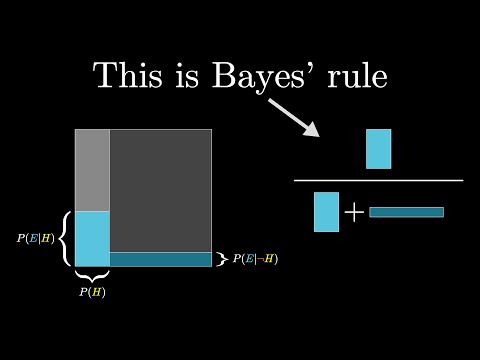

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('HZGCoVF3YvM')

## Classification using a Generative Model - Naive Bayes

A feature, or an attribute, a random variable, can be of two types: [continuous or district](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm).

### Discrete random variable
For a discrete random variable $x$, the generative approach is based on the following factorization of the joint probability distribution of (X,Y):
$$P(X=x, Y=y)=P(X=x | Y=y)P(Y=y)$$

where $P(X=x | Y=y)$ is the conditional probability of drawing a particular input pattern in a given class $y$ and $P(Y=y)$ is the prior probability of drawing an example of this class.

Using [Bayes' rule](https://en.wikipedia.org/wiki/Bayes%27_theorem) this decomposition also provides access to the posterior class-membership probabilities which are useful for classification.

Overall, the generative approach amounts to the following steps:

1. Estimate the prior probabilities $P(Y=y)$ for all labels $y∈Y$, e.g., via simply counting the classes:

$$P(Y=y)=\frac{1}{N}\sum_{i=1}^N1_{y_i=y}$$

2. Choose a family of distributions $P$ for the input pattern and assume it is the 'correct' distribution: $P(X=x | Y=y)∈P$

3. Estimate the conditional distribution in all classes.

4. Classify new input patterns with

\begin{align*}
	f( x) &= \arg\max_{y\in Y} P(Y=y\ |\ X = x)  & (\text{optimal classification rule}^*)\\
	& = \arg\max_{y\in Y}\frac{P(X= x\ |\ Y = y) P(Y=y)}{P(X=x)}  &  (\text{due to Bayes' rule})	\\
	& =  \arg\max_{y\in Y} P(X= x\ |\ Y = y)  P(Y=y) & (\text{because } P(X= x) \text{ is always a constant, always the same, wrt. } y \text{, so let's get rid of it} )
\end{align*}

∗ - this classification rule would be optimal if we had access to the true probabilities.

Depending on the choice of distribution family $P$, we obtain different classifiers.

### Continuous random variable

Continuous values are a bit more complicated. We can no longer calculate the conditional probabilities as we did before ( $P(X | Y)$, because there are simply way too many possible input Xs (e.g. 0.01, 0.001, 0.00001, all the way to infinity).

One way to overcome it is to *bin* those values into ranges - as we did with the ages on the first example (20-39, 39-64, 65+). The other option is to calculate them using density functions.

So if our $X$ is a continuous random variable, the generative approach is stated in terms of the [conditional probability density functions](https://en.wikipedia.org/wiki/Probability_density_function) $f_{X|Y=y}(x | Y=y)$ instead of the conditional probabilities $P(X=x | Y=y)$. Specifically, we work from the decomposition of the mixed density:

$$f_{X,Y}(x,\ Y=y) = f_{X|Y=y}( x\ |\ Y = y) f(Y=y) $$

Assuming, of course, that we chose the 'correct' distribution density function $f$.

To learn in a more visualized way about density functions and continuous random variables, I recommend you watching this video:

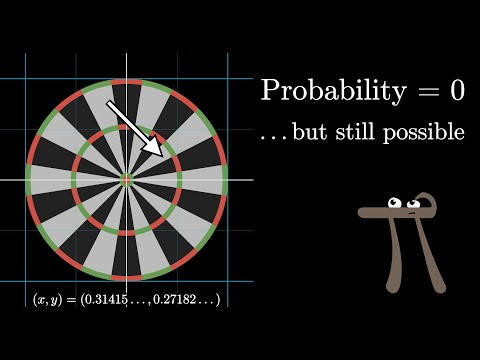

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZA4JkHKZM50')

# Exercise

Let's try it out.

In this exercise, we will train a [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). We will
* make prior assumptions as for the distribution of our data; and
* train a model to find the best parameters for that distribution

Let's see how it works:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

We will use some email data which we will classify as **spam** or not.

In [27]:
df_emails = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/spam_or_not_spam.csv', encoding="UTF-8")
df_emails.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [28]:
df_emails['email']

,email
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1,martin a posted tassos papadopoulos the greek ...
2,man threatens explosion in moscow thursday aug...
3,klez the virus that won t die already the most...
4,in adding cream to spaghetti carbonara which ...
...,...
2995,abc s good morning america ranks it the NUMBE...
2996,hyperlink hyperlink hyperlink let mortgage le...
2997,thank you for shopping with us gifts for all ...
2998,the famous ebay marketing e course learn to s...


In [29]:
df_emails['label']

,label
0,0
1,0
2,0
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,1


Let's divide the data into [**training** and **test** sets](https://builtin.com/data-science/train-test-split)

In [50]:
############## YOUR TURN ##############
# Divide the data into training and test set using sklearn's train_test_split.
# use the colunm 'email' for the training data
# use the column 'label' as the target y

import numpy as np
from sklearn.model_selection import train_test_split

X = df_emails['email']
y = df_emails['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 750, train_size= 2250)

########################################

In [51]:
print(X_train)

334     john hall ran across a site which claimed to e...
1952    url eNUMBERcNUMBERcaNUMBERfcNUMBERaNUMBEReNUMB...
2382    url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...
246     the times september NUMBER NUMBER hitler style...
2719    attn i am bulawa mulete jr the son of mr steve...
                              ...                        
78      reza b far ebuilt wrote problems why do most c...
2050    url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...
2740    important information the new domain names are...
1731     tim i d prefer to strip html tags from everyt...
2414    url URL date not supplied three researchers ar...
Name: email, Length: 2250, dtype: object


In [52]:
print(y_train)

334     0
1952    0
2382    0
246     0
2719    1
       ..
78      0
2050    0
2740    1
1731    0
2414    0
Name: label, Length: 2250, dtype: int64


We are going to use some NLP-specific methods here. Machine Learning Models are expecting numerical values as their input.

Therefore, we must process the text a bit - transforming every word to some fraction, based on their frequency.   
This score represents how unique the word is, based on their appearance count in the whole dataset.

We will use a [Naive Bayes, assuming a Multinomial distribution](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), and put it in a data processing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [53]:
# Create Pre-processing pipeline and a Multinomial Naive Bayes classifier.

# CountVectorizer calculates the frequency of words in the dataset (how often they appear)
# TfidfTransformer calculates the frequency of a word in this document, divided by their frequency over ALL the documents.

# MultinomialNB is a Naive Bayes classifier assuming a multinomial distribution

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])

And we train:

In [54]:
spam_classifier.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Now that we have a classifier - let's filter some spam!!!

In [55]:
y_preds = spam_classifier.predict(X_test.values.astype('U'))

How well did we do?

We can test our model results of the test set using different metrics from the sklearn metrics package.

For example, the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) which calculates precision, recall, f1-score and accuracy:

In [56]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.86      1.00      0.93       637
    Not Spam       1.00      0.12      0.21       113

    accuracy                           0.87       750
   macro avg       0.93      0.56      0.57       750
weighted avg       0.88      0.87      0.82       750



Pay attention to the results. Our dataset is not balanced, hence we have large differences between the different f1-scores.

If we plot a confusion table, we can clearly see that we didn't do so well, despite the high f1-score:

<Axes: >

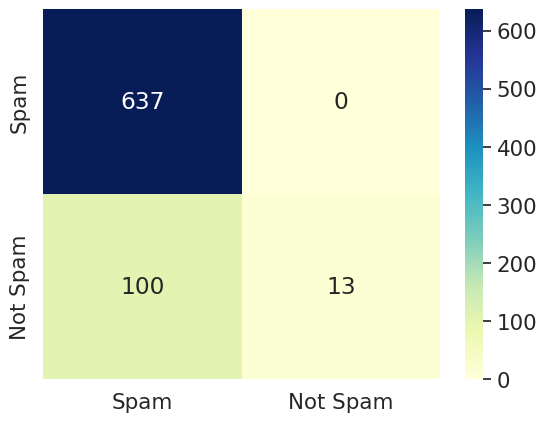

In [58]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

This is one of the reasons that the [Mathew's Correlation Coefficients](https://www.statisticshowto.com/matthews-correlation-coefficient/) is such a good alternative to the F1-Score:

In [59]:
print(metrics.matthews_corrcoef(y_test, y_preds))

0.31533227686260423


# Can we do better?

Let's try it again - this time with another inductive bias - we will assume the distribution of the text is of [`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

---
## Your turn:

Create a pipeline with a [Complement Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes), which fits better imbalanced classes, and train it on our dataset.

Check your results on the test-set and plot a confussion matrix.

How did your new model do?

In [68]:
### Your turn ###
X2 = df_emails['email']
y2 = df_emails['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 750, train_size= 2250)

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB()), ])
##################

In [69]:
spam_classifier.fit(X2_train.values.astype('U'), y2_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', ComplementNB())])

In [70]:
y2_preds = spam_classifier.predict(X2_test.values.astype('U'))

In [71]:
print(metrics.classification_report(y2_test, y2_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.90      1.00      0.95       625
    Not Spam       1.00      0.46      0.63       125

    accuracy                           0.91       750
   macro avg       0.95      0.73      0.79       750
weighted avg       0.92      0.91      0.89       750



<Axes: >

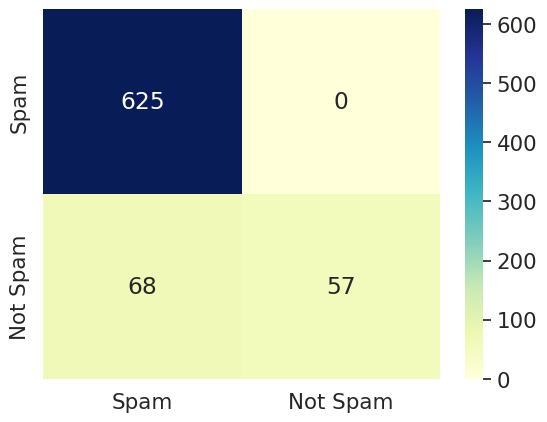

In [72]:
conf_mat = metrics.confusion_matrix(y2_test, y2_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

In [73]:
print(metrics.matthews_corrcoef(y2_test, y2_preds))

0.6412919859591348


## Or even better

There is one major problem with the Naive-Bayes model:

If a word did not exist during the training, it was never counted. If such a word suddenly appear during inference, it will cause a division by 0 (the posterior - the previous observation is 0).

Think about it for a moment: in spam messages, we ALWAYS have newly invented words! Spam senders are trying to trick the spam-detector model by changing letters (i=!) to alter existing words to new words.

### How can we overcome this?

One way to solve it is called the "Add-one Smoothing", where we add one (1) to both the denominator and numerator. But this smoothing value doesn't have to be 1. We can change this value to *any* positive number, even fractions!

$P(w | positive) = \frac{number of samples with w and y = positive + \alpha}{N+\alpha * K}$

Try playing with the Additive (also called Laplace/Lidstone) smoothing parameter of the MultinomialNB or the ComplementNB.  
The parameter is named **alpha** in the scikit-learn implementation.

Challenge yourself: Can you score above 95%? above 98%? above 99%?

Or even better - can you automate the search of this hyperparameter using a [grid or a random search?](https://scikit-learn.org/stable/modules/grid_search.html)

## No Smoothing in ComplementNB

In [75]:
X3 = df_emails['email']
y3 = df_emails['label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size= 750, train_size= 2250)

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB(alpha=0, force_alpha=True)), ])

spam_classifier.fit(X3_train.values.astype('U'), y3_train)

y3_preds = spam_classifier.predict(X3_test.values.astype('U'))

              precision    recall  f1-score   support

        Spam       0.91      1.00      0.95       623
    Not Spam       1.00      0.52      0.68       127

    accuracy                           0.92       750
   macro avg       0.96      0.76      0.82       750
weighted avg       0.93      0.92      0.91       750

0.6879962637677763


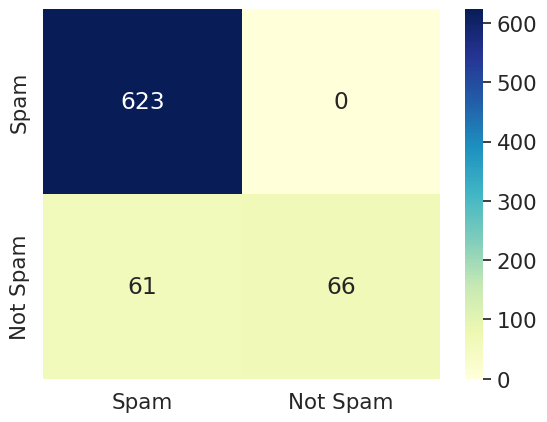

In [76]:
print(metrics.classification_report(y3_test, y3_preds, target_names=["Spam","Not Spam"]))

conf_mat = metrics.confusion_matrix(y3_test, y3_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

print(metrics.matthews_corrcoef(y3_test, y3_preds))

# No Smoothing in MultinomialNB

In [79]:
X4 = df_emails['email']
y4 = df_emails['label']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size= 750, train_size= 2250)

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=0, force_alpha=True)), ])

spam_classifier.fit(X4_train.values.astype('U'), y4_train)

y4_preds = spam_classifier.predict(X4_test.values.astype('U'))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


              precision    recall  f1-score   support

        Spam       0.90      1.00      0.95       625
    Not Spam       0.98      0.45      0.62       125

    accuracy                           0.91       750
   macro avg       0.94      0.72      0.78       750
weighted avg       0.91      0.91      0.89       750

0.6277911020442057


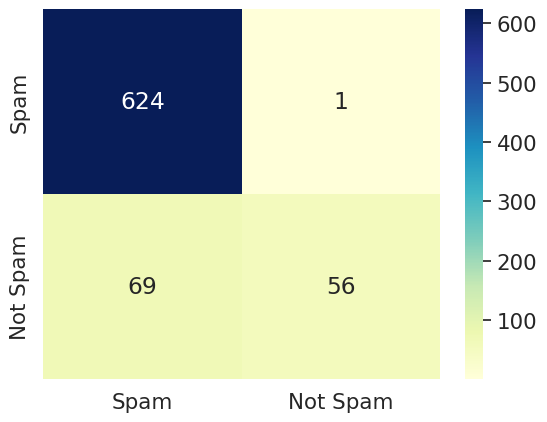

In [78]:
print(metrics.classification_report(y4_test, y4_preds, target_names=["Spam","Not Spam"]))

conf_mat = metrics.confusion_matrix(y4_test, y4_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

print(metrics.matthews_corrcoef(y4_test, y4_preds))

# Smoothing in ComplementNB

In [80]:
X5 = df_emails['email']
y5 = df_emails['label']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size= 750, train_size= 2250)

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB(alpha=1e-10)), ])

spam_classifier.fit(X5_train.values.astype('U'), y5_train)

y5_preds = spam_classifier.predict(X5_test.values.astype('U'))

              precision    recall  f1-score   support

        Spam       0.95      1.00      0.97       615
    Not Spam       0.97      0.76      0.85       135

    accuracy                           0.95       750
   macro avg       0.96      0.88      0.91       750
weighted avg       0.95      0.95      0.95       750

0.8360387940464634


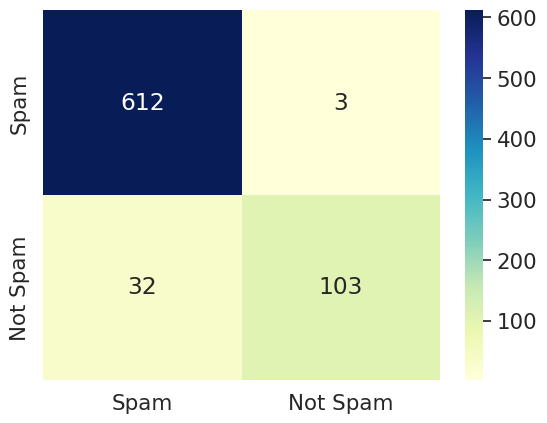

In [81]:
print(metrics.classification_report(y5_test, y5_preds, target_names=["Spam","Not Spam"]))

conf_mat = metrics.confusion_matrix(y5_test, y5_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

print(metrics.matthews_corrcoef(y5_test, y5_preds))

# Smoothing in MultinomialNB

In [ ]:
X6 = df_emails['email']
y6 = df_emails['label']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size= 750, train_size= 2250)

spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=1e-10)), ])

spam_classifier.fit(X6_train.values.astype('U'), y6_train)

y6_preds = spam_classifier.predict(X6_test.values.astype('U'))

In [ ]:
print(metrics.classification_report(y4_test, y4_preds, target_names=["Spam","Not Spam"]))

conf_mat = metrics.confusion_matrix(y4_test, y4_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

print(metrics.matthews_corrcoef(y4_test, y4_preds))

# Diving deeper

To dive deeper into the topic and to observe more examples, please consider [reading or watching this article](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html)

## Bonus: Try another model

Try comparing your achieved results with another model (kNN, Decision Tree, Random Forest). Hint: you'll need to still use the TFIDF.

Which model yield the best results?